In [3]:
from afinn import Afinn
import pandas as pd
import numpy
import xlsxwriter
df=pd.read_excel('D:\AffinArabic\DataSet\AabicToEnglishDataset.xlsx')

In [4]:
df.head()

Unnamed: 0                                             Arabic  \
0           0                         ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿ®ÿπÿØ ÿßŸÑÿ•ÿµÿØÿßÿ± ÿßŸÑÿ¨ÿØŸäÿØ   
1           1                                  ÿßÿ®ŸÑŸÉŸäÿ¥ŸÜ ÿ≤ÿ®ÿßŸÑŸá ÿ®ÿ¨ÿØ   
2           2                                 ÿ≥Ÿäÿ¶ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäÿπŸÖŸÑ   
3           3  ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥Ÿàÿ£ ŸÉÿßŸÜ ÿ¨ÿØÿß ÿ±ÿßÿ¶ÿπ Ÿàÿ≥ŸáŸÑ Ÿàÿ®ÿ≥Ÿäÿ∑ ÿß...   
4           4                     ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿ∑Ÿäÿ¶ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿπŸÜÿØ ÿßŸÑŸÅÿ™ÿ≠   

                                             English     Class  
0                      Too bad after the new version  Negative  
1                         Really rubbish application  Negative  
2                                Bad app not working  Negative  
3  Unfortunately, for the worst, the application ...  Negative  
4               The update is very slow when opening  Negative

In [5]:
sentences=df['English']
actual_class=df['Class']
ArabicSentences=df['Arabic']

In [6]:
df.count

<bound method DataFrame.count of      Unnamed: 0                                             Arabic  \
0             0                         ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿ®ÿπÿØ ÿßŸÑÿ•ÿµÿØÿßÿ± ÿßŸÑÿ¨ÿØŸäÿØ   
1             1                                  ÿßÿ®ŸÑŸÉŸäÿ¥ŸÜ ÿ≤ÿ®ÿßŸÑŸá ÿ®ÿ¨ÿØ   
2             2                                 ÿ≥Ÿäÿ¶ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäÿπŸÖŸÑ   
3             3  ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥Ÿàÿ£ ŸÉÿßŸÜ ÿ¨ÿØÿß ÿ±ÿßÿ¶ÿπ Ÿàÿ≥ŸáŸÑ Ÿàÿ®ÿ≥Ÿäÿ∑ ÿß...   
4             4                     ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿ∑Ÿäÿ¶ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿπŸÜÿØ ÿßŸÑŸÅÿ™ÿ≠   
..          ...                                                ...   
444         699                               ÿ±ÿßÿ¶ÿπ Ÿàÿ®ÿßŸÑÿ™ŸàŸÅŸäŸÇ Ÿäÿßÿ±ÿ®‚öò   
445         700                       ŸÖŸÖŸÉŸÜ ÿßÿπÿ±ŸÅ ŸÖÿ™Ÿâ ÿ±ÿßÿ≠ ŸäŸàÿµŸÑ ÿßŸÑÿ∑ŸÑÿ®   
446         701                                ÿ±ÿ¶ÿπ ÿ¨ÿØÿß ÿ®ÿ≥ ŸÖŸÅŸäÿ¥ ÿÆÿµŸÖ   
447         702                                           ŸÖŸÖÿ™ÿßÿßÿßÿßÿ≤   
448         703 

In [11]:

predicted_class=[]
afinn = Afinn()
workbook = xlsxwriter.Workbook('D:\AffinArabic\output\ArabicSentimentAnalysisUsing-Afinn.xlsx')
worksheet1 = workbook.add_worksheet()
row=0

worksheet1.write(row, 0, str("Arabic Sentence"))
worksheet1.write(row, 1, str("English Sentence"))
worksheet1.write(row, 2, str("Actual Class"))
worksheet1.write(row, 3, str("Predicted Score"))
worksheet1.write(row, 4, str("Predicted Class"))
i=0

for sentence in sentences:
    sentiment_score = afinn.score(sentence)
    
    if sentiment_score > 0:
        sentiment = "positive"
        predicted_class.append("Positive")
    elif sentiment_score <= 0:
        sentiment = "Negative"
        predicted_class.append("Negative")

    
    print(f"Sentence: '{sentence}'")
    print('Sentiment:' + str(sentiment))
    print('Score:' + str(sentiment_score))
    row=row+1
    worksheet1.write(row, 0, str(ArabicSentences[i]))
    worksheet1.write(row, 1, str(sentence))
    worksheet1.write(row, 2, str(actual_class[i]))
    worksheet1.write(row, 3, str(sentiment_score))
    worksheet1.write(row, 4, str(sentiment))
    i=i+1
workbook.close()

Sentence: 'Too bad after the new version'
Sentiment:Negative
Score:-3.0
Sentence: 'Really rubbish application'
Sentiment:Negative
Score:0.0
Sentence: 'Bad app not working'
Sentiment:Negative
Score:-6.0
Sentence: 'Unfortunately, for the worst, the application was very wonderful, easy, and simple. Now it is complicated and does not open with you easily, and you do not find all the services available to you'
Sentiment:positive
Score:2.0
Sentence: 'The update is very slow when opening'
Sentiment:Negative
Score:0.0
Sentence: 'Pass it by after the last update, it never opened, and it refuses any password you write or the card number .. Al-Ahly ruined the application that most people used to rely on, unfortunately'
Sentiment:Negative
Score:-4.0
Sentence: 'The application does not work. Every time I log in to my account, it does not open. Look for a solution. I am disabled'
Sentiment:Negative
Score:-2.0
Sentence: 'Unfortunately, it is very bad. Since yesterday, I am trying to use it. I contact

Sentence: 'What is this app? It's been a shame for me for about 6 months. I can't log in to my account and call the customer. He says there's a defect. How long will this manipulation be fixed? By God, I withdraw all my money and go to a second bank, I seek refuge in God.'
Sentiment:Negative
Score:-4.0
Sentence: 'Historic bank and failed app üòú'
Sentiment:Negative
Score:-2.0
Sentence: 'The latest update has not spoken to me'
Sentiment:Negative
Score:0.0
Sentence: 'The update hid some of the recorded information'
Sentiment:Negative
Score:-1.0
Sentence: 'He gets stuck and the baptism process is always a failure!!!?? The app tired me, it was great at first, and now it's gone'
Sentiment:Negative
Score:-3.0
Sentence: 'C very much'
Sentiment:Negative
Score:0.0
Sentence: 'The program does not work, requests an update, and it does not happen'
Sentiment:Negative
Score:-3.0
Sentence: 'Bad update app stuck won't open'
Sentiment:Negative
Score:-2.0
Sentence: 'Suspended, not satisfied with enteri

Sentence: 'The program needs speed in navigating between menus, like the previous version, and currently the program has stopped working'
Sentiment:positive
Score:1.0
Sentence: 'Unfortunately, the app is missing a lot of updates'
Sentiment:Negative
Score:-2.0
Sentence: 'From morning until now, the application is not working, it tells you that maintenance is disrupting people's interests'
Sentiment:Negative
Score:-4.0
Sentence: 'The app hangs a lot'
Sentiment:Negative
Score:0.0
Sentence: 'CC very much'
Sentiment:Negative
Score:0.0
Sentence: 'Very bad application and a lot of comments and malfunctions'
Sentiment:Negative
Score:-3.0
Sentence: 'You are not satisfied with me, write (we were unable to fulfill your request, please try again) I hope the problem is resolved.'
Sentiment:positive
Score:5.0
Sentence: 'The application has become a failure after the last update.. and it is still failing even after 4/4'
Sentiment:Negative
Score:-4.0
Sentence: 'Unfortunately, the application does not 

Sentence: 'How can expired coupons be redeemed?'
Sentiment:positive
Score:2.0
Sentence: 'The best application in the world as long as without advertising'
Sentiment:positive
Score:3.0
Sentence: 'Wonderful application, thanks Talabat'
Sentiment:positive
Score:6.0
Sentence: 'The best food delivery program in Iraq in all respects'
Sentiment:positive
Score:5.0
Sentence: 'An unfair program'
Sentiment:Negative
Score:-2.0
Sentence: 'Mmnaz'
Sentiment:Negative
Score:0.0
Sentence: 'Zd1 p. 3 p'
Sentiment:Negative
Score:0.0
Sentence: 'Very excellent, and thank you for your interest'
Sentiment:positive
Score:6.0
Sentence: 'Frankly, Talabat is a wonderful and very comfortable thing, and at any time you ask for what you have in mind. Good luck, Lord, and God willing, the application will develop more and become in all fields'
Sentiment:positive
Score:13.0
Sentence: 'I can't download the app.. I've been trying to download the app for days, but to no avail'
Sentiment:Negative
Score:-1.0
Sentence: 'Exce

In [12]:
predicted_class

['Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',

In [13]:
actual_class

0      Negative
1      Negative
2      Negative
3      Negative
4      Negative
         ...   
444    Positive
445    Positive
446    Positive
447    Positive
448    Positive
Name: Class, Length: 449, dtype: object

In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(predicted_class,actual_class)

In [15]:
cm

array([[202,  50],
       [ 27, 170]], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted_class,actual_class)


0.8285077951002228

In [17]:
from sklearn.metrics import classification_report
print(classification_report(predicted_class,actual_class))

              precision    recall  f1-score   support

    Negative       0.88      0.80      0.84       252
    Positive       0.77      0.86      0.82       197

    accuracy                           0.83       449
   macro avg       0.83      0.83      0.83       449
weighted avg       0.83      0.83      0.83       449



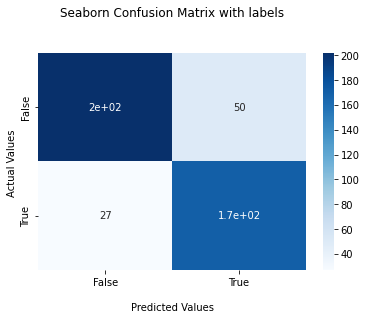

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

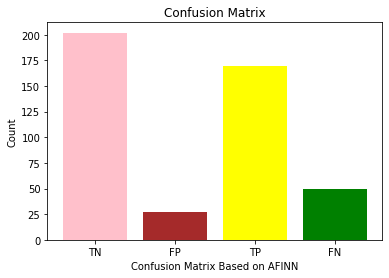

Precision: 0.86
Recall: 0.77
F1 Score: 0.82


In [22]:
import matplotlib.pyplot as plt
TN=202
FP=27
TP=170
FN=50

# Calculate metrics
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Create a bar graph
labels = ['TN', 'FP', 'TP', 'FN']
values = [TN, FP, TP, FN]

plt.bar(labels, values, color=['pink', 'brown', 'yellow', 'green'])
plt.xlabel('Confusion Matrix Based on AFINN')
plt.ylabel('Count')
plt.title('Confusion Matrix')
plt.show()

# Print additional metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score:.2f}')